# Clustering FTIR Scanners based on claibration Dataset

## Introduction:

In this Note book we aim to Find a way to cluster 8 FTIR scanners depending on their  response upon a calibration dataset of contains sample measured on all 8 devices.
The approach in this notebook is to use the reponse of each device to the calibration sample to extract features of the device that can help us categorize this device

## Theory:

As we said we need some features to cluster these devices.
We can assume that an insightful feature of the device that can help us distinguishing it from the others is simply a metric that could tell us how similar or disimilar this device relative to the other .


So, we will try to calculate some metrics that could be insightful of how each device is similar to other devices.

We will calculate Two seperate metrics and use them both as feature of our scanner

### Average Eucledian Distance:

The average Eucledian distance is the equavelant of pythagoras distance but in more than 2 dimensions:

![Fig-A2-Example-of-the-difference-between-the-Euclidean-distance-d-and-Mahalanobis.png](Fig-A2-Example-of-the-difference-between-the-Euclidean-distance-d-and-Mahalanobis.png) 

For each Device we will calculate the average Eucledian Distance between it and all the other devices across all samples.

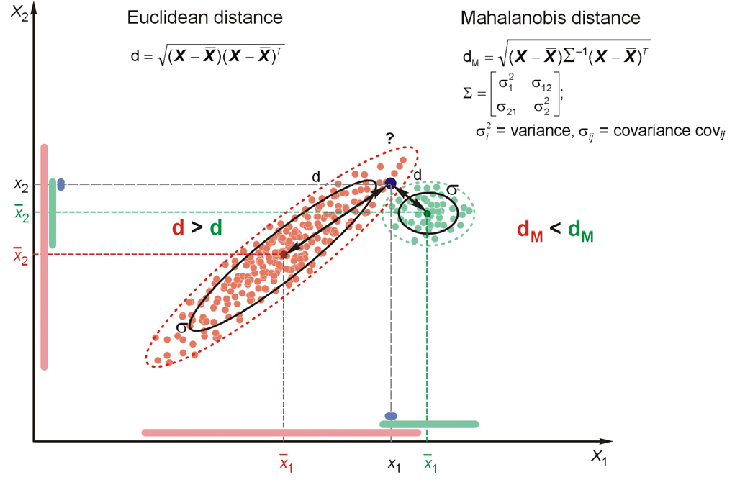

### Average Cosine Distance:

This approach measures the average  cosine similarity (angular distance) between two devices across all samples

![2b4a7a82-ad4c-4b2a-b808-e423a334de6f.png](2b4a7a82-ad4c-4b2a-b808-e423a334de6f.png)
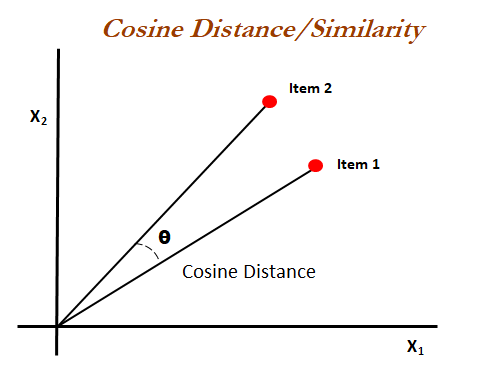

## Implementation:

First We need to import our packages

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import signal
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 10]


In [ ]:
# Useful for later formatting
astr_br = '*******************************************************************************************'
hash_br = '#############################################################################################################################'
equl_br = '====================================================================================================================='


Then we will read our datasets of each scanner from CSV files

First we need to make sure that all of the spectra are in the absorbance form ,
so we convert the spectra that are in the reflectance form to the absorbance form:

To convert We use the formula :Absorbance =  2-log10(Reflectance) 

In [19]:
path = 'E:\Study\GP\Datasets\Clustering and calibration transfer dataset\Calibration Set\\'
my_path = path + 'Absorbance form\\'
my_path2 = path + 'Reflectance form\\'


df_52 = pd.read_csv(my_path2+'scanner_52.csv')
df_171 = pd.read_csv(my_path2+'scanner171.csv')

for i in range(30):
    df_171.iloc[i] = 2-np.log10(df_171.iloc[i])
    df_52.iloc[i] = 2-np.log10(df_52.iloc[i])
    

Then we will read the rest of the files without conversion because the are already in the absorbance form

In [20]:
df_122 = pd.read_csv(my_path+'122_spectrum.csv')
df_169 = pd.read_csv(my_path+'169_spectrum.csv')
df_190 = pd.read_csv(my_path+'190_spectrum.csv')
df_10119 = pd.read_csv(my_path+'10119_spectrum.csv')
df_10121 = pd.read_csv(my_path+'10121_spectrum.csv')
df_211100001 = pd.read_csv(my_path+'211100001_spectrum.csv')
# there was a problem in the keys of the device 169 as they were not equal to the rest of column names due to rounding error 
# so I fixed that error with the following Line
df_169 = pd.DataFrame(df_169.to_numpy(),columns=df_122.keys())

Now We will print some info about the data frames to get an insight of the data

In [21]:
df_52.head()

,3921.568654,3935.185205,3948.801756,3962.418307,3976.034857,3989.651408,4003.267959,4016.884509,4030.50106,4044.117611,...,7284.856681,7298.473231,7312.089782,7325.706333,7339.322884,7352.939434,7366.555985,7380.172536,7393.789086,7407.405637
0,0.559955,0.572687,0.584987,0.596320,0.606629,0.616297,0.625783,0.635000,0.642807,0.646931,...,0.153694,0.154630,0.150994,0.143075,0.133128,0.123763,0.116628,0.111852,0.108364,0.104766
1,0.465879,0.474068,0.481795,0.489209,0.496969,0.506115,0.517631,0.531721,0.547072,0.560544,...,0.195049,0.197223,0.193727,0.184755,0.173011,0.161722,0.152961,0.147012,0.142785,0.138813
2,0.652061,0.666571,0.680367,0.692731,0.703478,0.712782,0.720804,0.727227,0.730965,0.730314,...,0.194990,0.193524,0.189209,0.182064,0.173283,0.164434,0.156681,0.150389,0.145208,0.140489
3,0.697644,0.711909,0.725419,0.737518,0.748086,0.757374,0.765595,0.772437,0.776753,0.776712,...,0.223218,0.220355,0.214972,0.206997,0.197286,0.187011,0.177102,0.168006,0.159795,0.152432
4,0.539026,0.552614,0.565611,0.577367,0.587643,0.596419,0.603634,0.608850,0.611086,0.608982,...,0.135796,0.135767,0.133592,0.129347,0.124015,0.118804,0.114527,0.111306,0.108670,0.105957


In [22]:
df_52.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Columns: 257 entries, 3921.568654 to 7407.405637
dtypes: float64(257)
memory usage: 60.4 KB


So the data of each device have wavenumbers  3921.568654 to 7407.405637

In [23]:
df_52.describe()

,3921.568654,3935.185205,3948.801756,3962.418307,3976.034857,3989.651408,4003.267959,4016.884509,4030.50106,4044.117611,...,7284.856681,7298.473231,7312.089782,7325.706333,7339.322884,7352.939434,7366.555985,7380.172536,7393.789086,7407.405637
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.535277,0.546889,0.558117,0.568461,0.577798,0.586406,0.594675,0.602619,0.609382,0.613090,...,0.174208,0.174466,0.170766,0.163316,0.153986,0.145004,0.137803,0.132576,0.128551,0.124686
std,0.101095,0.102165,0.103172,0.104114,0.104979,0.105652,0.105912,0.105507,0.104319,0.102504,...,0.054066,0.052465,0.050974,0.049427,0.047600,0.045292,0.042473,0.039397,0.036549,0.034423
min,0.241635,0.250093,0.258091,0.265233,0.271683,0.278430,0.286843,0.297833,0.310839,0.323173,...,0.065945,0.071358,0.071100,0.065648,0.058173,0.052299,0.050090,0.051312,0.053938,0.055431
25%,0.462937,0.473330,0.484410,0.495167,0.504948,0.512974,0.519138,0.526814,0.534863,0.542361,...,0.132051,0.133607,0.131463,0.125375,0.117289,0.110284,0.105679,0.102682,0.100208,0.097391
50%,0.541352,0.554492,0.567162,0.578608,0.588461,0.596672,0.603315,0.608219,0.610671,0.609399,...,0.171846,0.170326,0.166313,0.160064,0.151079,0.142415,0.135835,0.131304,0.127555,0.123042
75%,0.619283,0.629061,0.638598,0.647688,0.656485,0.665501,0.675282,0.685868,0.696245,0.703784,...,0.222829,0.219646,0.214333,0.206825,0.198857,0.190721,0.182572,0.173837,0.165278,0.158278
max,0.697644,0.711909,0.725419,0.737518,0.748086,0.757374,0.765595,0.772437,0.776753,0.776712,...,0.273070,0.272091,0.265621,0.253584,0.238098,0.221981,0.207370,0.195158,0.189925,0.187121


Next we will plot a certain sample measured by all devices to see the small shifts in peaks 

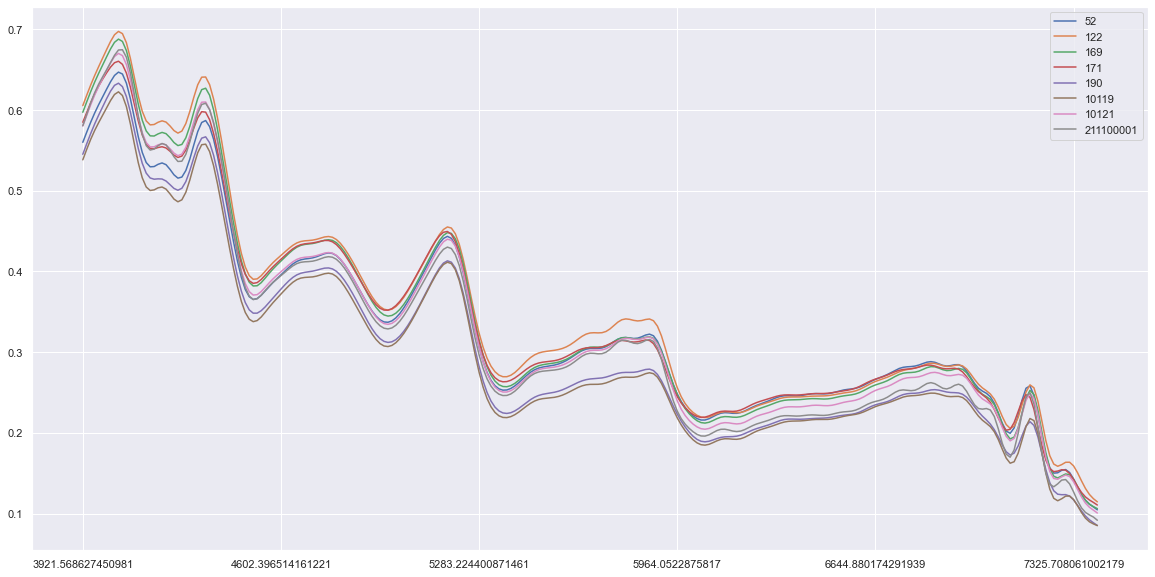

In [24]:
index = 0 # the sample number from 0 to 29
df_52.iloc[index].plot(label='52')
df_122.iloc[index].plot(label='122')
df_169.iloc[index].plot(label='169')
df_171.iloc[index].plot(label='171')
df_190.iloc[index].plot(label='190')
df_10119.iloc[index].plot(label='10119')
df_10121.iloc[index].plot(label='10121')
df_211100001.iloc[index].plot(label='211100001')

plt.legend() #give each device a different color

In [25]:
scanner_names = ['52','122','169','171','190','10119','10121','211100001']
scanners = {
    '52':df_52,
    '122':df_122,
    '169':df_169,
    '171':df_171,
    '190':df_190,
    '10119':df_10119,
    '10121':df_10121,
    '211100001':df_211100001
}


In [26]:
from scipy.spatial import distance

dist_types_list = [
    'Euclidean',
    'Minkowski',
    'Cosine',
    'Manhattan',
    'Bray-Curtis',
    'Canberra',
    'Chebyshev',
    'Correlation',
    'Sokal-Michener',
    'Sokal-Sneath',
    'Minkowski',
    'Yule',
]

def select_dist_func(dist_func):
    if dist_func == 'Euclidean':
        return distance.euclidean
    elif dist_func == 'Minkowski':
        return distance.minkowski
    elif dist_func == 'Cosine':
        return distance.cosine
    elif dist_func == 'Manhattan':
        return distance.cityblock
    elif dist_func == 'Bray-Curtis':
        return distance.braycurtis
    elif dist_func == 'Canberra':
        return distance.canberra
    elif dist_func == 'Chebyshev':
        return distance.chebyshev
    elif dist_func == 'Correlation':
        return distance.correlation
    elif dist_func == 'Sokal-Michener':
        return distance.sokalmichener
    elif dist_func == 'Sokal-Sneath':
        return distance.sokalsneath
    elif dist_func == 'Yule':
        return distance.yule
    else:
        return distance.euclidean


In [27]:

def calc_dist(scanners_dict, dist_func_name, **kwargs):
    """
    Calculates the distance between the spectra of the devices
    Parameters
    scanners_dict: dict
    dictionary of the spectra of the devices, keys are the names of the devices and values are the spectra
    dist_func_name: str
    the distance function to be used
    **kwargs:
    the parameters of the distance function
    Returns
    dist_matrix: numpy.ndarray
    the distance matrix of the devices
    """
    dist_dict = dict()                                  # dictionary of the distances between the devices
    dist_func = select_dist_func(dist_func_name)
    for scanner1 in scanners_dict:                      # Scanner1 is the key for the subject device
        dist_list = []                                  
        readings_count = len(scanners_dict[scanner1])   # The number of readings of the subject device
        for scanner2 in scanners_dict:                  # Scanner2 is the key for devices to be subtracted from the subject device
            mean_dist = 0
            for i in range(readings_count):
                    mean_dist += dist_func(scanners_dict[scanner1].iloc[i],scanners_dict[scanner2].iloc[i],**kwargs)
            dist_list.append(mean_dist/readings_count)
        dist_dict[scanner1] = dist_list
    return dist_dict


In [28]:
global_dist_dict = dict()                   # Dictionary of the distances between the devices
for dist_func in dist_types_list:
    if dist_func == 'Minkowski':
        global_dist_dict[dist_func] = calc_dist(scanners, dist_func, p=3)
    else:
        global_dist_dict[dist_func] = calc_dist(scanners, dist_func)


In [29]:
def report_distance_results(dist_type):
    """
    Reports the results of the distance calculation for the given distance type
    """
    print(f'Report for {dist_type} distance\
        \n{equl_br}')
    for subject in scanner_names: # the name of the scanner  in the question
        sorted_distance_indeces = sorted(range(len(global_dist_dict[dist_type][subject])), key=lambda k: global_dist_dict[dist_type][subject][k])
        print(f'Scanners sorted upon their average {dist_type} distance from the subject: {subject}')
        for i in sorted_distance_indeces:
            print(f'Scanner: {scanner_names[i]} -> {dist_type} distance: {global_dist_dict[dist_type][subject][i]}')
        print(astr_br)
    print(equl_br)


In [30]:
print(hash_br)
for dist_func in dist_types_list:
    report_distance_results(dist_func)
print(hash_br)

#############################################################################################################################
Report for Euclidean distance        
Scanners sorted upon their average Euclidean distance from the subject: 52
Scanner: 52 -> Euclidean distance: 0.0
Scanner: 171 -> Euclidean distance: 0.22521313479755906
Scanner: 10121 -> Euclidean distance: 0.23113427276655527
Scanner: 169 -> Euclidean distance: 0.23643135330596293
Scanner: 122 -> Euclidean distance: 0.2421037231835489
Scanner: 190 -> Euclidean distance: 0.30286420354027943
Scanner: 10119 -> Euclidean distance: 0.4519743378687908
Scanner: 211100001 -> Euclidean distance: 0.457510881527366
*******************************************************************************************
Scanners sorted upon their average Euclidean distance from the subject: 122
Scanner: 122 -> Euclidean distance: 0.0
Scanner: 169 -> Euclidean distance: 0.20665988198681787
Scanner: 52 -> Euclidean distance: 0.2421037231835489
Scanne

Now  We will Generate a full report concerning a certain scanner as it will sort all the other scanners from the nearst to the furthest in both the eucledian and cosine metric indicating the value of eucledian and cosine distance of each of them 

Its obvious that the cosine similarity between all the scanners is almost 1 so we will disregard the cosine similarity 

Now before we start clustering lets scatter plot both metrics for a ceratin scanner

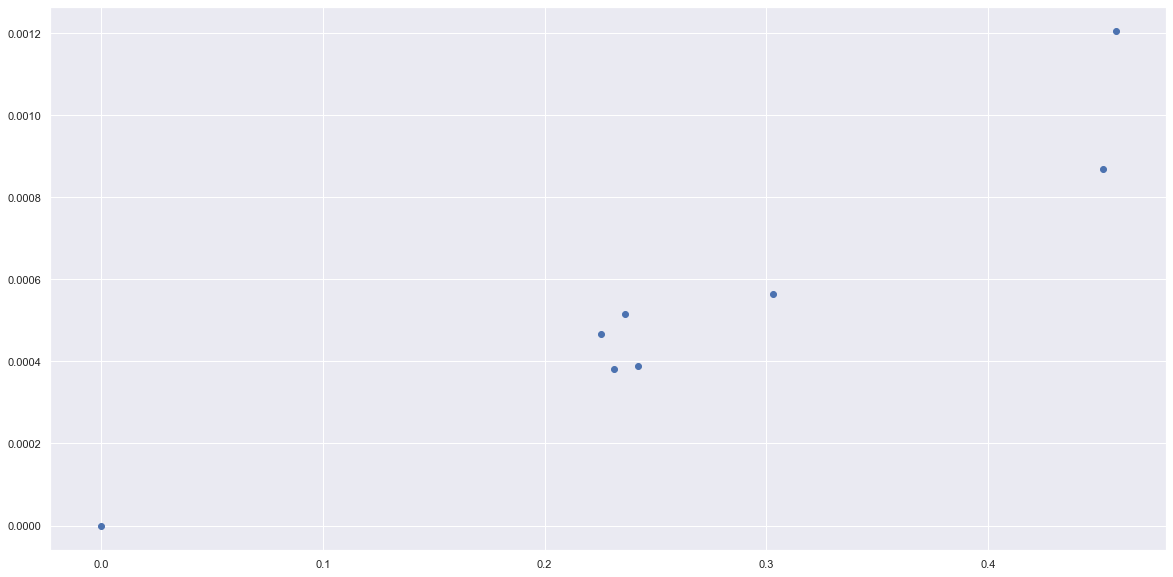

In [31]:
plt.scatter(global_dist_dict['Euclidean']['52'],global_dist_dict['Cosine']['52'])

Now its clearer that clustering is begining to take place

### Heatmap :

In [32]:
dist_matrices = dict()
for dist_type in global_dist_dict.keys():
    dist_matrices[dist_type] = pd.DataFrame(global_dist_dict[dist_type], index=scanner_names, columns=scanner_names)
dist_matrices['Minkowski']  # Minkowski distance matrix

,52,122,169,171,190,10119,10121,211100001
52,0.000000,0.111193,0.105678,0.098897,0.128093,0.185509,0.100334,0.189993
122,0.111193,0.000000,0.087678,0.129646,0.152124,0.216114,0.121876,0.208889
169,0.105678,0.087678,0.000000,0.110964,0.117421,0.164114,0.082557,0.162503
171,0.098897,0.129646,0.110964,0.000000,0.118005,0.158853,0.102656,0.176254
190,0.128093,0.152124,0.117421,0.118005,0.000000,0.136389,0.109469,0.109866
10119,0.185509,0.216114,0.164114,0.158853,0.136389,0.000000,0.142150,0.145591
10121,0.100334,0.121876,0.082557,0.102656,0.109469,0.142150,0.000000,0.145772
211100001,0.189993,0.208889,0.162503,0.176254,0.109866,0.145591,0.145772,0.000000


In [33]:
def plot_dist_matrix_heatmap():
	"""
	Plots the distance matrix heatmap for all possible distance types
	"""
	for dist_type in global_dist_dict.keys():
		# Get Maximum and minimum(non-zero) values for each distance metric and print them
		Mx = dist_matrices[dist_type].max().max()
		Mn = dist_matrices[dist_type].where(dist_matrices[dist_type].gt(0)).min(0).min()
		print(f"For the {dist_type} Distance:\nMax is: {Mx}\nMin is: {Mn}\nDifference is: {Mx-Mn}\n{astr_br}")

		# Configure plot specs and color scheme
		fig,ax = plt.subplots(1,1)
		my_colors= sns.color_palette("ch:s=.25,rot=-.25", 4)
		# Draw the heatmap with the mask and correct aspect ratio
		sns.heatmap(dist_matrices[dist_type], cmap=my_colors, annot=True, ax=ax)
		# Set the title
		ax.set_title(f'{dist_type} Distance Matrix', fontsize=25)
		# Draw the colorbar with the correct segments
		colorbar = ax.collections[0].colorbar
		colorbar.set_ticks([1/8*Mx, 3/8*Mx, 5/8*Mx, 7/8*Mx])
		colorbar.set_ticklabels(['Very Close', 'Close', 'Far','Very Far'])


For the Euclidean Distance:
Max is: 0.5188038639823307
Min is: 0.19401919738266835
Difference is: 0.3247846665996623
*******************************************************************************************
For the Minkowski Distance:
Max is: 0.21611423663447552
Min is: 0.0825565788051238
Difference is: 0.1335576578293517
*******************************************************************************************
For the Cosine Distance:
Max is: 0.0012038981274314243
Min is: 7.764270003470796e-05
Difference is: 0.0011262554273967164
*******************************************************************************************
For the Manhattan Distance:
Max is: 7.888490318990084
Min is: 2.8300463371440716
Difference is: 5.058443981846013
*******************************************************************************************
For the Bray-Curtis Distance:
Max is: 0.05187306852655008
Min is: 0.017089109567707317
Difference is: 0.034783958958842766
***************************************

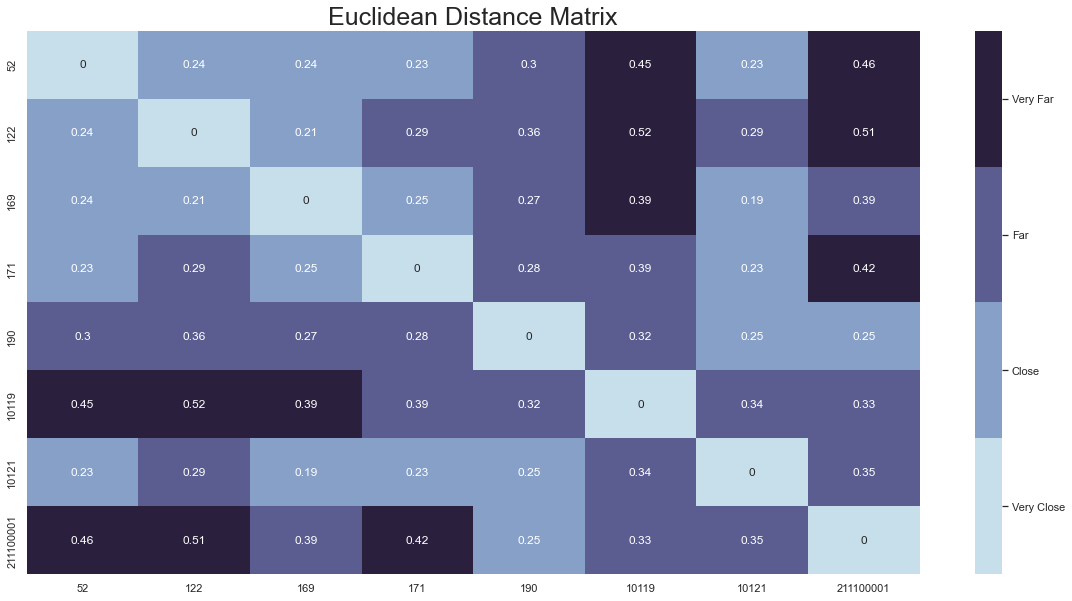

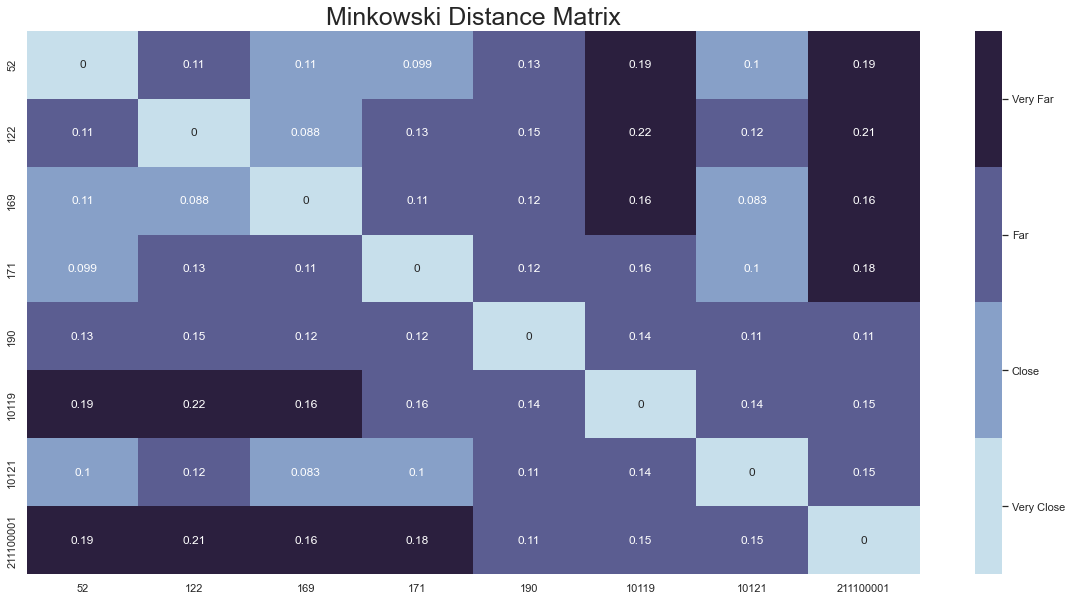

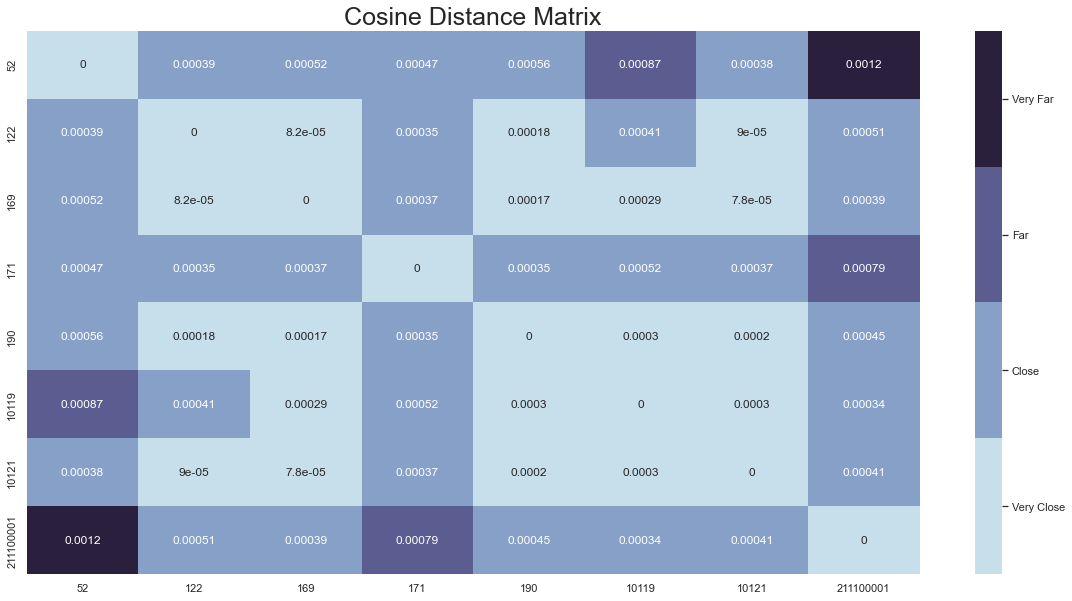

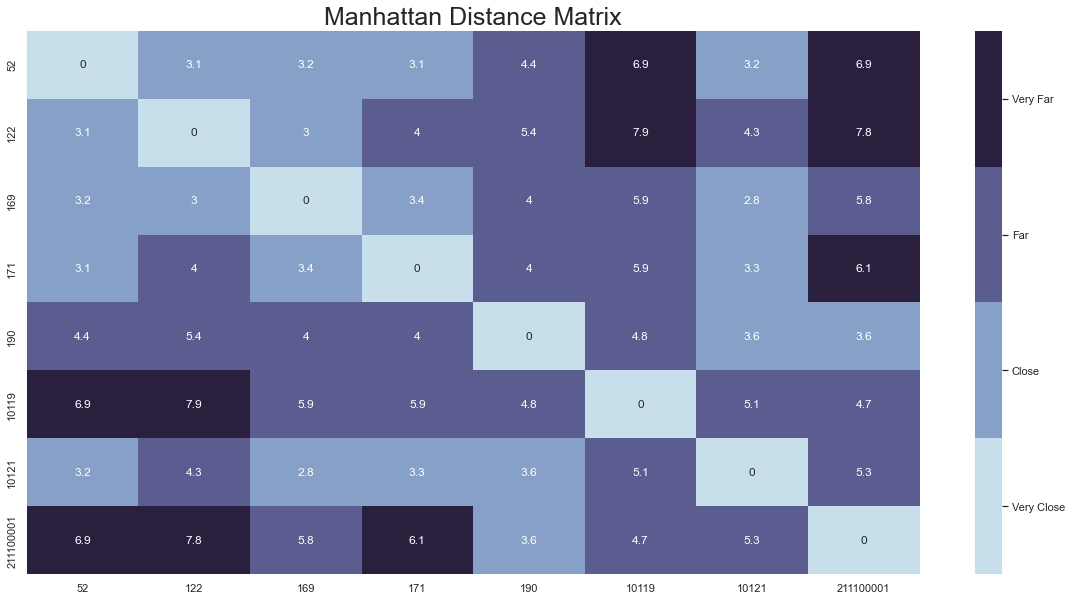

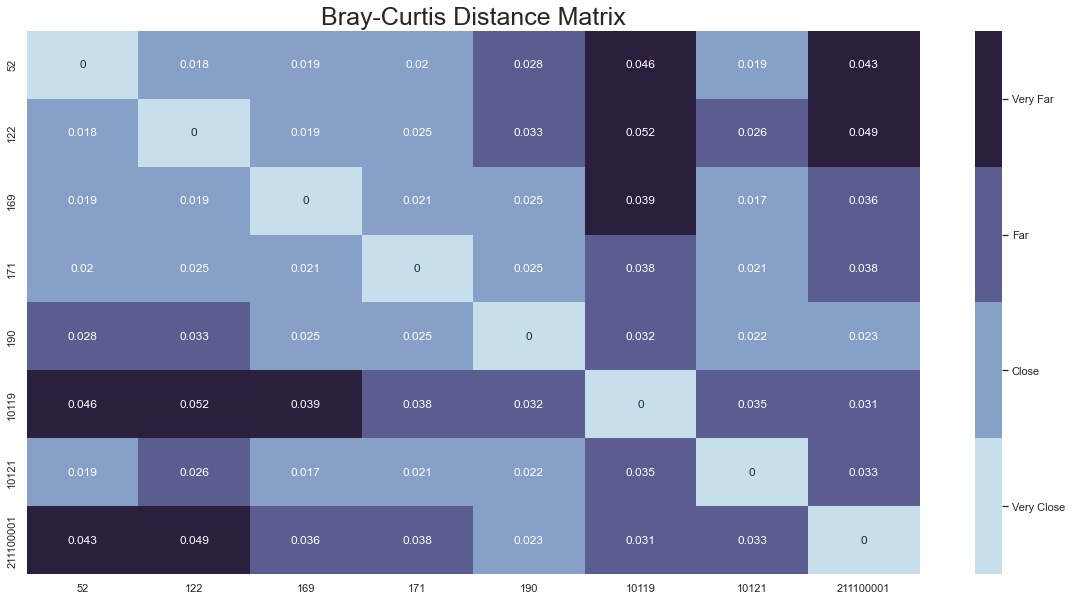

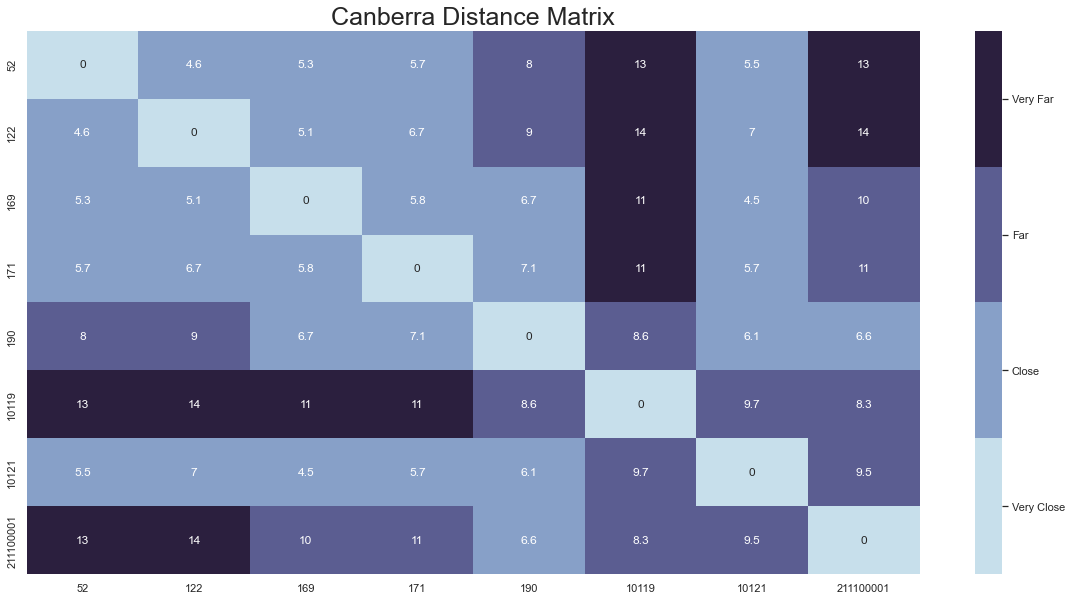

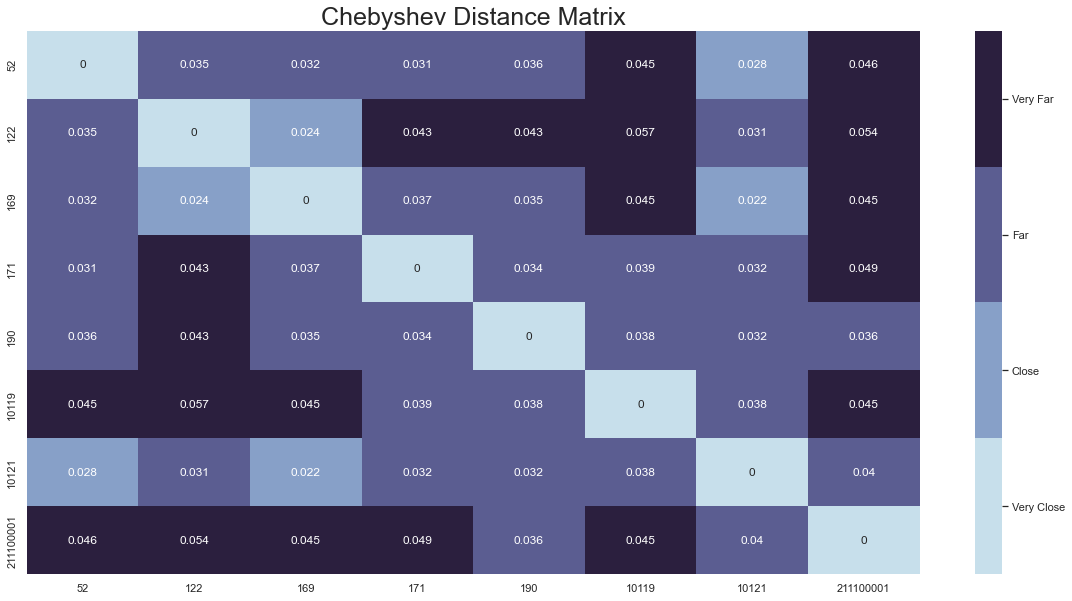

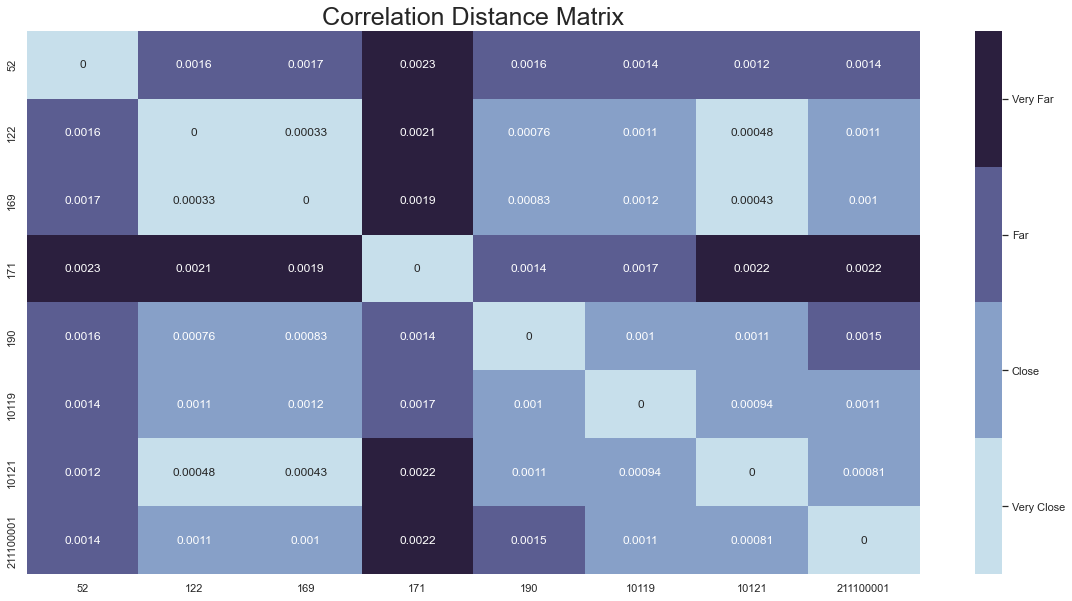

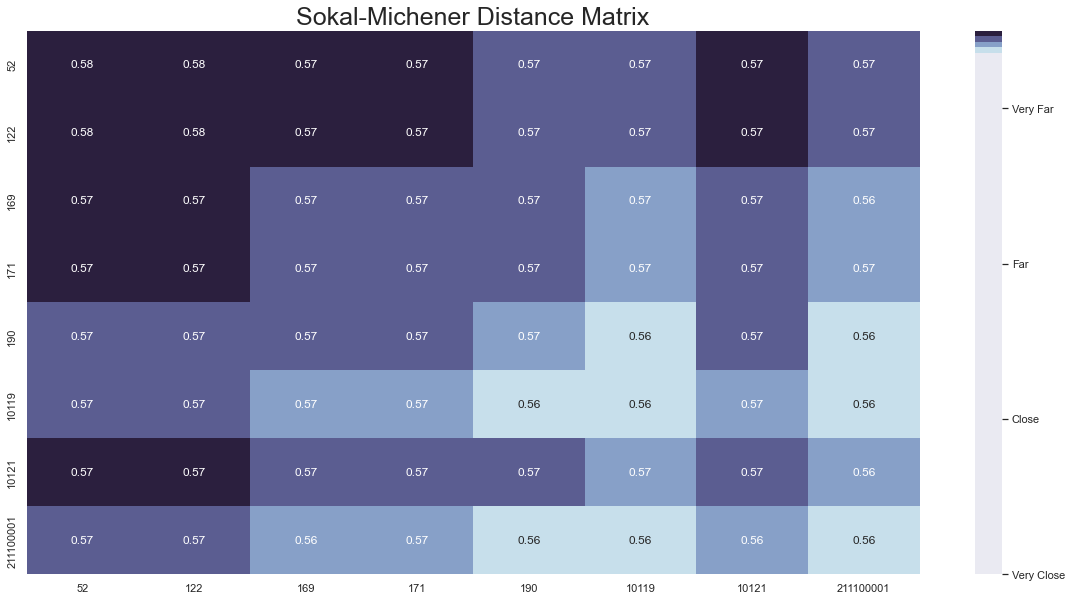

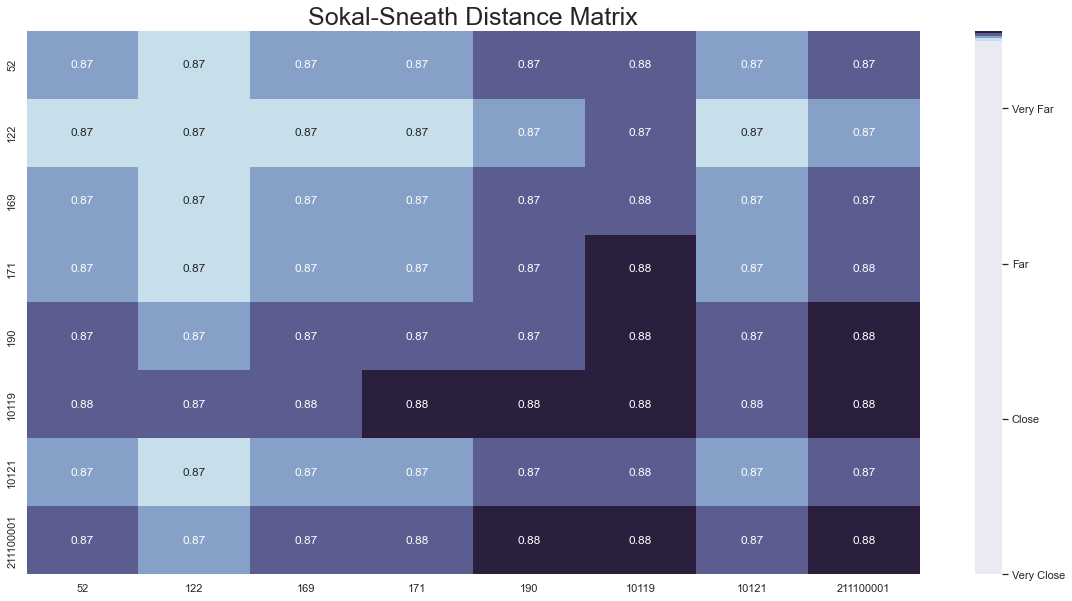

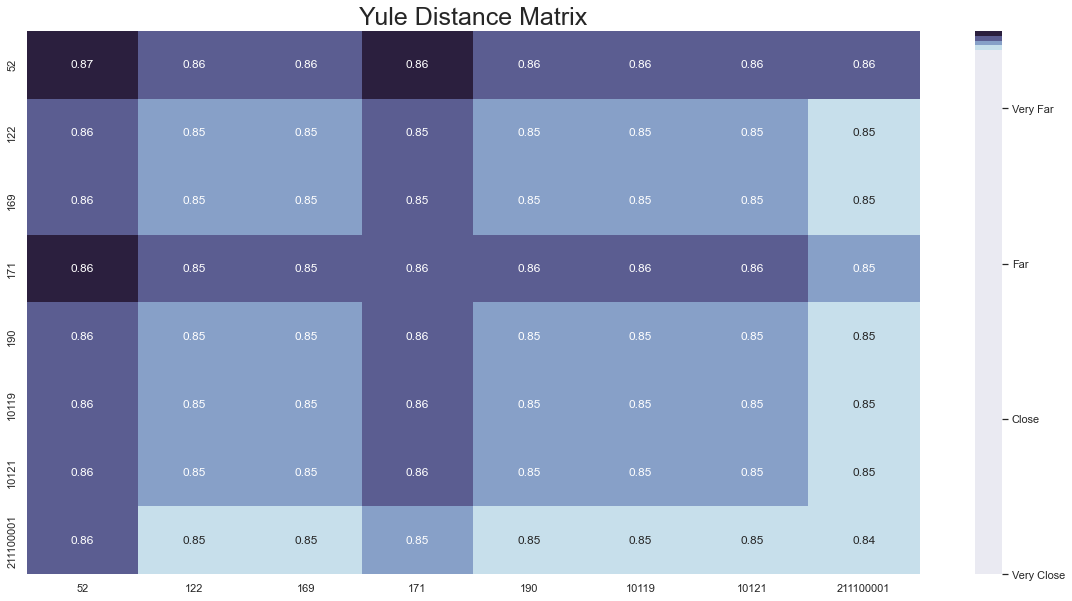

In [34]:
sns.set_theme()
plot_dist_matrix_heatmap()